In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, datetime

In [10]:
#df_cases = pd.read_csv('../../data/external/pandemic/owid-covid-data_US.csv', parse_dates=['date'])
#df_cases_USA = df_cases.query('iso_code == "USA"')
#df_cases_USA = df_cases_USA[['date', 'new_cases', 'new_cases_smoothed']]
#df_cases_USA = df_cases_USA[df_cases_USA['date'] <= datetime.fromisoformat('2022-02-03')]
#df_cases_USA.tail()

,date,new_cases,new_cases_smoothed
170806,2022-01-30,197945.0,505146.857
170807,2022-01-31,542235.0,450895.571
170808,2022-02-01,325402.0,426931.571
170809,2022-02-02,329513.0,384860.000
170810,2022-02-03,274798.0,351792.143


In [3]:
#df_cases.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
180516,ZWE,Africa,Zimbabwe,2022-04-16,247237.0,0.0,44.571,5462.0,0.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
180517,ZWE,Africa,Zimbabwe,2022-04-17,247278.0,41.0,45.714,5463.0,1.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
180518,ZWE,Africa,Zimbabwe,2022-04-18,247297.0,19.0,41.000,5464.0,1.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
180519,ZWE,Africa,Zimbabwe,2022-04-19,247297.0,0.0,29.000,5464.0,0.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
180520,ZWE,Africa,Zimbabwe,2022-04-20,247336.0,39.0,25.143,5466.0,2.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [5]:
df_trends = pd.read_csv('../construct_network/data/processed/gt.csv', parse_dates=['date'])
df_trends.tail()

,date,flu,cough,fever,headache,lagnat,rashes,sipon,ubo,ecq,face-shield,Frontliners,masks,Quarantine,social-distancing,work-from-home
361,2021-03-12,36.441893,75.307300,90.206361,63.822608,94.080340,74.589148,99.861490,83.975684,83.907572,92.541128,0.000000,inf,86.022248,0.0,60.829615
362,2021-03-13,42.425101,98.422502,97.312443,80.787731,96.901810,75.786387,97.848811,97.520940,99.409440,78.456262,0.000000,inf,89.049905,0.0,0.000000
363,2021-03-14,30.539947,76.825923,98.935775,88.763186,86.258003,97.396080,61.873142,66.325783,99.376455,86.472081,70.439103,0.0,90.102620,0.0,85.717629
364,2021-03-15,32.652502,84.766073,87.099116,78.806233,63.025798,65.448622,inf,71.215538,99.134888,56.305721,0.000000,inf,98.639708,0.0,87.691429
365,2021-03-16,38.557130,75.950998,83.196726,90.797952,37.822053,60.741734,62.679384,inf,70.389141,76.412647,0.000000,inf,81.936848,inf,67.745187


In [12]:
tags = [
    "/m/01cpyy", # Coronavirus (Virus)
    "/m/01b_06", # Symptom (Topic)
    "/m/07kfjfg", # Airborne transmission (Disease)
    
    "/m/0dsdr32", # Travel warning (Topic)
    "/m/05zdp", # Public transport (Transit service type)
    "/m/012sj0", # Hygiene (Topic)

    "/m/07__7", # Vaccine (Topic)
    "/m/0dxh1", # Emergency medical services (Medical specialty)
    "/m/0119h9rd", # Rapid diagnostic test (Topic)
]
labels = [
    "cough",
    "ecq",
    "face-shield",
    
    "fever",
    "flu",
    "Frontliners",
    
    "headache",
    "lagnat",
    "masks",
    "Quarantine",
    "rashes",
    "sipon",
    "social-distancing",
    "work-from-home"
]

In [15]:
waves = [

]

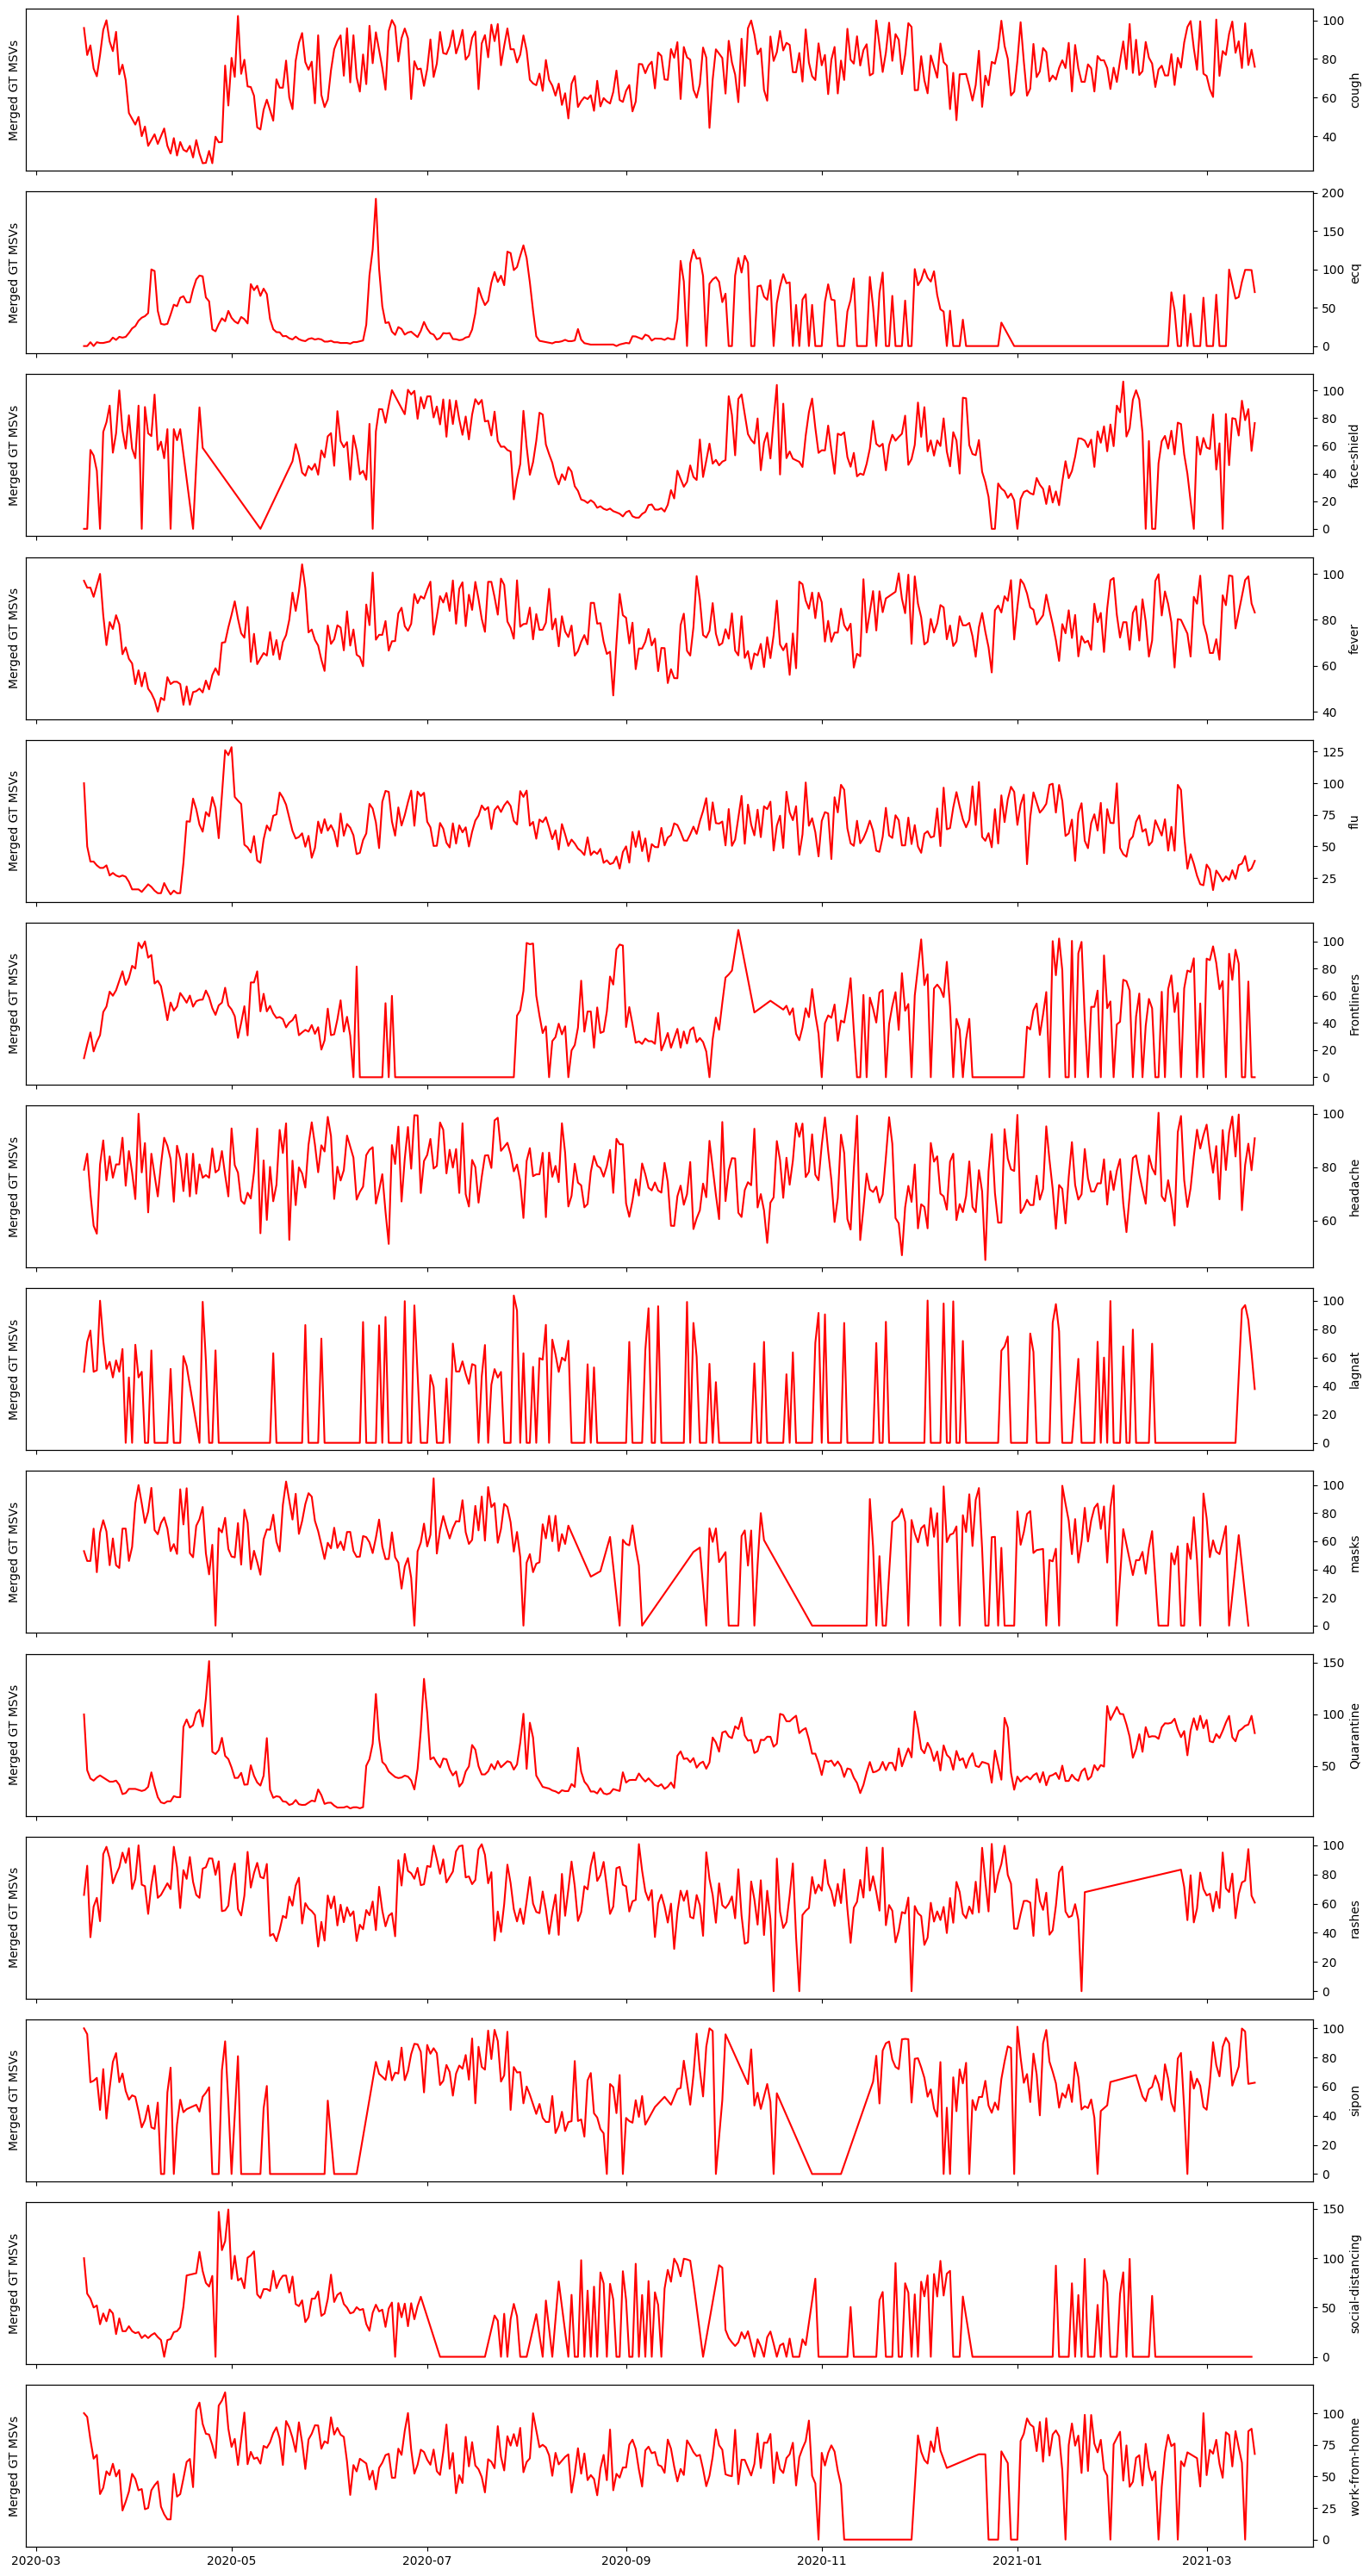

In [29]:
fig, axes = plt.subplots(nrows=14, sharex='all', figsize=(16, 30))

for index in range(14):
    current_column = labels[index]
    current_column = current_column.replace("/", ".")
    current_label = labels[index]

    ax2 = axes[index].twinx()
    
    axes[index].set_ylabel('Merged GT MSVs')
    
    # Hide y-axis ticks and labels for the main axes
    axes[index].yaxis.set_ticks([])
    axes[index].yaxis.set_ticklabels([])

    sns.lineplot(data=df_trends, x='date', y=current_column, ax=ax2, color="r")

    for wave in waves:
        (wave_start, wave_end, label, color) = wave

        wave_start = date.fromisoformat(wave_start)
        wave_end = date.fromisoformat(wave_end)

        axes[index].axvspan(
            xmin=wave_start, xmax=wave_end, 
            edgecolor="grey", linestyle="--", facecolor=color, alpha=0.5
        )

        if index == 0:
            adj_x = wave_start + ((wave_end - wave_start) / 2)
            adj_y = df_trends.iloc[:, 1].max()

            # Annotation code is commented out, kept for reference
            # ax2.annotate(
            #     " " * 3 + label, rotation=90,
            #     xy=(adj_x, adj_y),
            #     xycoords='data',
            #     horizontalalignment='left', verticalalignment='bottom'
            # )

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.savefig('../../graphs/Merged-GT.Selected14.pdf', bbox_inches='tight')
plt.savefig('../../graphs/Merged-GT.Selected14.png', bbox_inches='tight')
plt.show()